In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import math

import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual
from ipywidgets import FloatSlider

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans

<IPython.core.display.Javascript object>

In [3]:
timbre_cov_df = pd.read_csv("../data/timbre_df.csv", index_col=0)
timbre_cov_df.index = timbre_cov_df["id"]
timbre_cov_df = timbre_cov_df.drop("id", 1)
timbre_cov_df.head(2)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t9-t9,t10-t9,t11-t9,t0-t10,t1-t10,t10-t10,t0-t11,t1-t11,t10-t11,t11-t11
id,,,,,,,,,,,,,,,,,,,,,
1oK6IuZqBqljKHS3bFNUg7,51.823612,20.298719,-7.290977,-11.141729,27.893418,-17.370409,2.325935,-5.247523,7.916673,1.860364,...,293.081866,-9.255381,12.45546,-3.977513,-48.312000,261.299412,-7.627733,-75.358357,-16.209842,174.110043
1MSY5BfSg3wmtUFmtSBjs5,42.902985,57.353380,-8.897260,0.845510,34.859784,-18.322556,-10.257845,2.666678,-3.077387,6.007564,...,325.858969,-35.039057,0.69071,2.864370,78.139559,289.719916,-5.924260,57.640365,-25.937092,187.967932


<IPython.core.display.Javascript object>

In [4]:
id_tag = pd.read_csv("../data/filtered_id_tags.csv", index_col=0)
id_tag.head(2)

,fm_tag
id,
1lYmMZLBWTHPybgmK00OR1,alternative rap
0V9A00lULZ9ZzNslRXbvIZ,alternative rap


<IPython.core.display.Javascript object>

In [5]:
lyrics = pd.read_csv("../data/cleaned_3_lyrics.csv", index_col=0)
lyrics.head(2)

,original,cleaned,lang,fm_tag,cleaned_2,cleaned_3
id,,,,,,
1lYmMZLBWTHPybgmK00OR1,"Yo, huh, yo\n\nAy tell me I am different if yo...",yo huh yo ay tell differ feel chang mayb undif...,en,alternative rap,yo huh yo ay tell differ feel chang mayb undif...,yo huh yo ay tell different feel changed maybe...
0V9A00lULZ9ZzNslRXbvIZ,Undermining overthinking all the time\nYou kno...,undermin overthink time know know lens bifoc b...,en,alternative rap,undermin overthink lens bifoc bifurc sign true...,undermining overthinking time know know lenses...


<IPython.core.display.Javascript object>

In [6]:
english_cleaned = pd.read_csv("../data/final_id_tags_lyrics.csv", index_col=0)
english_cleaned.head(2)

,original,cleaned,lang,fm_tag
id,,,,
1MSY5BfSg3wmtUFmtSBjs5,"Yo, what's happenin Cold 187\nYo man, you know...",yo happenin cold yo man know laid back studio ...,en,gangsta rap
0FRENAN5snwnoRVJ6eDuFm,You coulda been mine but\nYou coulda been mine...,coulda mine coulda mine coulda mine put line c...,en,alternative rap


<IPython.core.display.Javascript object>

In [7]:
tagged = timbre_cov_df.loc[id_tag.index, :]

<IPython.core.display.Javascript object>

In [8]:
X = tagged
y = id_tag["fm_tag"]
drop_cols = ["t2-t2", "t3-t3", "t5-t5", "t7-t7", "t9-t9", "t10-t10"]

X = X.drop(drop_cols, 1)

<IPython.core.display.Javascript object>

In [9]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)
umap = UMAP(
    n_components=2,
    n_neighbors=40,
    min_dist=0.001,
    metric="cosine",
    random_state=42,
)
umap_df = pd.DataFrame(umap.fit_transform(std_X), columns=["c0", "c1"])
umap_df["fm_tag"] = y.values

<IPython.core.display.Javascript object>

/home/b1t/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c0', ylabel='c1'>

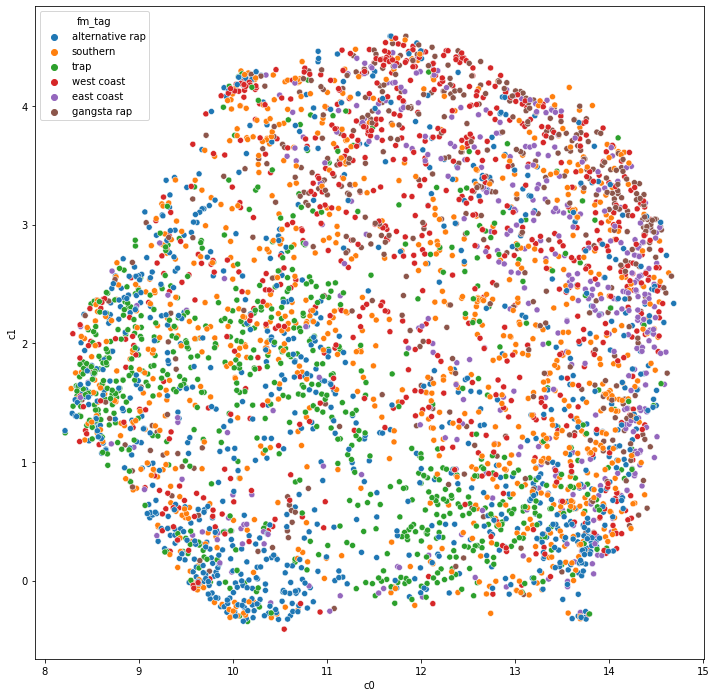

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", data=umap_df, hue="fm_tag")

In [11]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

<IPython.core.display.Javascript object>

In [12]:
# tfidf = TfidfVectorizer(min_df=2)
tfidf = TfidfVectorizer(
    max_df=0.5, min_df=2, use_idf=True, norm=u"l2", smooth_idf=True, ngram_range=(2, 2)
)
vectorized = tfidf.fit_transform(lyrics["cleaned_3"])

<IPython.core.display.Javascript object>

In [13]:
# tfidf_df = pd.DataFrame(
#     vectorized.toarray(), columns=tfidf.get_feature_names(), index=id_tag.index
# )

<IPython.core.display.Javascript object>

In [14]:
# english_df = tagged.join(tfidf_df, how="inner")

<IPython.core.display.Javascript object>

In [15]:
# X = english_df
y = id_tag["fm_tag"]

<IPython.core.display.Javascript object>

In [17]:
# scaler = StandardScaler()
# std_X = scaler.fit_transform(vectorized)
umap = UMAP(
    n_components=2,
    n_neighbors=40,
    min_dist=0.001,
    metric="cosine",
    random_state=42,
)
umap_df = pd.DataFrame(umap.fit_transform(vectorized), columns=["c0", "c1"])
umap_df["fm_tag"] = y.values

<IPython.core.display.Javascript object>

/home/b1t/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c0', ylabel='c1'>

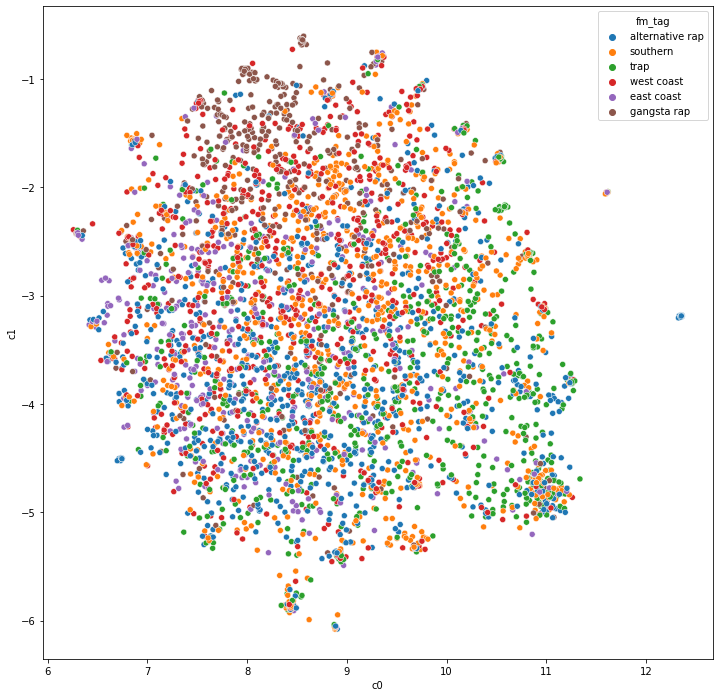

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", data=umap_df, hue="fm_tag")

In [8]:
song_features = pd.read_csv("../data/spotify_song_features.csv", index_col=0)

<IPython.core.display.Javascript object>

In [9]:
song_features.head(2)

,id,artist,title,album,popularity,artist_ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1lYmMZLBWTHPybgmK00OR1,SwizZz,More to Say,More to Say,16,3nSjdp5h4cbbTOn59qKKHR,0.492,0.644,7,-7.405,1,0.5600,0.0348,0.000000,0.123,0.425,173.440,255451,4
1,5MC3xdlx9DFop1Y4J1yDbE,Eagles,"New Kid in Town - Live at Capital Centre, Land...",Hotel California (40th Anniversary Expanded Ed...,30,0ECwFtbIWEVNwjlrfc6xoL,0.559,0.654,4,-7.977,1,0.0312,0.1260,0.000159,0.979,0.623,110.164,292733,4


<IPython.core.display.Javascript object>

In [10]:
lyrics = pd.read_csv("../data/lyrics.csv", index_col=0)
filt_lyrics = lyrics[lyrics["lang"] == "en"]

<IPython.core.display.Javascript object>

In [11]:
mult_id_tag = pd.read_csv("../data/mult_id_tag.csv", index_col=0)
mult_id_tag.head(2)

,sp_tag_cons,fm_tag,sp_filled,fm_filled
sp_song_id,,,,
0QE1NjeCyrAbYVVNwJDqsa,NaN,alternative rap,alternative rap,alternative rap
40cvs2pISPXxPdHizhD9aE,NaN,alternative rap,alternative rap,alternative rap


<IPython.core.display.Javascript object>

In [12]:
mult_id_tag = mult_id_tag.groupby(mult_id_tag.index).first()

<IPython.core.display.Javascript object>

In [13]:
filt_lyrics.head()

,original,cleaned,lang
id,,,
1oK6IuZqBqljKHS3bFNUg7,Puff puff pass and I'm in that\nCircle with my...,puff puff pass circl boy roll weed zig zag lig...,en
1MSY5BfSg3wmtUFmtSBjs5,"Yo, what's happenin Cold 187\nYo man, you know...",yo happenin cold yo man know laid back studio ...,en
1AGjfwW4QoWFfhp1IA6wcE,"Yeah man, ever since I was a kid like\nPeople ...",yeah man ever sinc kid like peopl would ask fa...,en
0FRENAN5snwnoRVJ6eDuFm,You coulda been mine but\nYou coulda been mine...,coulda mine coulda mine coulda mine put line c...,en
3BUWNzPWz2mDbptZmGEXpB,"Let it all work out, let it all work out\nLet ...",let work let work let work let work let work l...,en


<IPython.core.display.Javascript object>

In [14]:
filt_lyrics = filt_lyrics[filt_lyrics.index.isin(mult_id_tag.index)]

<IPython.core.display.Javascript object>

In [15]:
mult_id_tag

,sp_tag_cons,fm_tag,sp_filled,fm_filled
sp_song_id,,,,
003jkRNJgEDGcWGPatebHa,southern,southern,southern,southern
008DCRi4MybmSHKzU3WNBt,NaN,NaN,NaN,NaN
00AAj1kdx0mf5agqVniktg,east coast,NaN,east coast,east coast
00BVCwOFPMVboVah2vxgQj,southern,trap,southern,trap
00CVY07T9feLMyIdlatufZ,NaN,alternative rap,alternative rap,alternative rap
...,...,...,...,...
7zL7fpZhwFkCLBU4T045sA,west coast,west coast,west coast,west coast
7zLCMBMKYkYRUz2ETmz45o,west coast,west coast,west coast,west coast
7zM9AkYxe5I8DhyosYodPS,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [16]:
filt_lyrics = filt_lyrics[
    filt_lyrics["cleaned"] != "lyric song yet releas pleas check back song releas"
]

<IPython.core.display.Javascript object>

In [17]:
filtered_features = song_features.loc[
    song_features["id"].isin(filt_lyrics.index), :
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [18]:
filtered_features.index = filtered_features["id"]
filtered_features = filtered_features.drop("id", 1)

<IPython.core.display.Javascript object>

In [19]:
filt_lyrics.head(2)

,original,cleaned,lang
id,,,
1oK6IuZqBqljKHS3bFNUg7,Puff puff pass and I'm in that\nCircle with my...,puff puff pass circl boy roll weed zig zag lig...,en
1MSY5BfSg3wmtUFmtSBjs5,"Yo, what's happenin Cold 187\nYo man, you know...",yo happenin cold yo man know laid back studio ...,en


<IPython.core.display.Javascript object>

In [20]:
filtered_features

,artist,title,album,popularity,artist_ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,
1lYmMZLBWTHPybgmK00OR1,SwizZz,More to Say,More to Say,16,3nSjdp5h4cbbTOn59qKKHR,0.492,0.644,7,-7.405,1,0.5600,0.03480,0.000000,0.1230,0.425,173.440,255451,4
5MC3xdlx9DFop1Y4J1yDbE,Eagles,"New Kid in Town - Live at Capital Centre, Land...",Hotel California (40th Anniversary Expanded Ed...,30,0ECwFtbIWEVNwjlrfc6xoL,0.559,0.654,4,-7.977,1,0.0312,0.12600,0.000159,0.9790,0.623,110.164,292733,4
7GZKme55JpmLq3alBDQm11,All Time Low,Dirty Laundry,Last Young Renegade,54,46gyXjRIvN1NL1eCB8GBxo,0.560,0.751,4,-6.022,0,0.0364,0.00168,0.000052,0.1680,0.177,93.969,197640,4
4d2ETTRKavzvVAdo98g1T9,J.PERIOD,Thought vs. Hot 97 Freestyle - J.PERIOD Live R...,The Live Mixtape [Top 5 MC’s Edition],11,"1MGyQRNDBHqVYkW1nNKRBv, 6DJEUXZm0e2rAohdoZ5Voo...",0.623,0.928,8,-7.647,0,0.3140,0.51100,0.000002,0.7090,0.589,97.357,276292,4
0V9A00lULZ9ZzNslRXbvIZ,Rhys Langston,Jesus of Los Feliz,Aggressively Ethnically Ambiguous,0,"3TQniQ8z5QYYsAjrWrl72E, 5SIczlZdCyA9JdQsszygHB",0.829,0.666,5,-8.417,0,0.1100,0.73600,0.017300,0.1330,0.584,119.096,132270,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22DYLSLl5MVjkhCWmRzYjy,Wu-Tang Clan,Sound The Horns,Chamber Music,40,"34EP7KEpOjXcM2TCat1ISk, 7fDLDq2weBagiAFD2j17Al...",0.732,0.680,0,-6.640,1,0.1170,0.09350,0.000001,0.1180,0.549,97.066,195387,4
5SblZH3EFpP8j0O5cJFsrM,Phil J.,LIBERATED,LIBERATED,13,5D2KHBBywjO32ifLVWSci9,0.830,0.645,0,-3.705,1,0.4110,0.30300,0.000016,0.0653,0.844,83.004,237140,4
3ZKRGwMeoJ7aGCCKwfNNhv,Sicx,Killing Fields,If These Walls Could Talk,6,7DkekyYG58l8cuUWgAfYT7,0.606,0.541,1,-9.363,1,0.3410,0.29500,0.000014,0.1170,0.262,79.849,227213,4


<IPython.core.display.Javascript object>

In [21]:
i = "0O1f1x7Qqhke0XLPn8mCxB"
mult_id_tag.loc[i, "sp_tag_cons"]

'southern'

<IPython.core.display.Javascript object>

In [22]:
for i in filtered_features.index:
        filtered_features.loc[i, "tag"] = mult_id_tag.loc[i, "sp_tag_cons"]


<IPython.core.display.Javascript object>

In [23]:
filtered_features.head(2)

,artist,title,album,popularity,artist_ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tag
id,,,,,,,,,,,,,,,,,,,
1lYmMZLBWTHPybgmK00OR1,SwizZz,More to Say,More to Say,16,3nSjdp5h4cbbTOn59qKKHR,0.492,0.644,7,-7.405,1,0.5600,0.0348,0.000000,0.123,0.425,173.440,255451,4,NaN
5MC3xdlx9DFop1Y4J1yDbE,Eagles,"New Kid in Town - Live at Capital Centre, Land...",Hotel California (40th Anniversary Expanded Ed...,30,0ECwFtbIWEVNwjlrfc6xoL,0.559,0.654,4,-7.977,1,0.0312,0.1260,0.000159,0.979,0.623,110.164,292733,4,NaN


<IPython.core.display.Javascript object>

In [24]:
filtered_features.columns

Index(['artist', 'title', 'album', 'popularity', 'artist_ids', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'tag'],
      dtype='object')

<IPython.core.display.Javascript object>

In [91]:
filtered_features.dtypes

artist               object
title                object
album                object
popularity            int64
artist_ids           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
tag                  object
dtype: object

<IPython.core.display.Javascript object>

In [92]:
filtered_features = filtered_features[
    (filtered_features["duration_ms"] < 600000)
    & (filtered_features["duration_ms"] > 60000)
]
filtered_features = filtered_features[
    filtered_features["title"].str.lower().str.contains("intro|interlude|instrumental")
    == False
]
composers = ["Wolfgang Amadeus Mozart", "Ottorino Respighi", "Antonio Vivaldi"]

filtered_features = filtered_features[
    filtered_features["artist"].isin(composers) == False
]
filtered_features = filtered_features[filtered_features["instrumentalness"] <= 0.882]

filtered_features = filtered_features[filtered_features["acousticness"] <= 0.95]

<IPython.core.display.Javascript object>

In [25]:
desc_cols = [
    "popularity",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

<IPython.core.display.Javascript object>

In [26]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

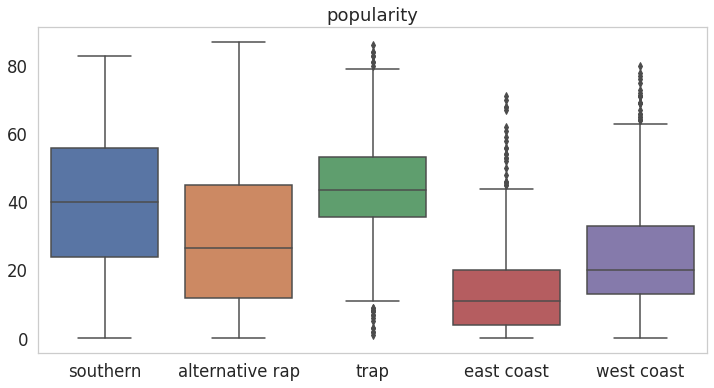

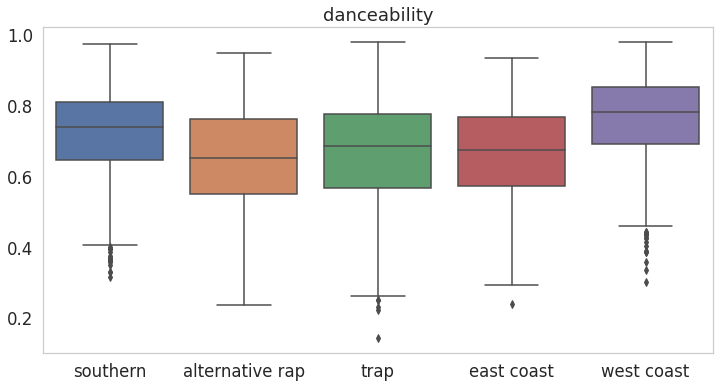

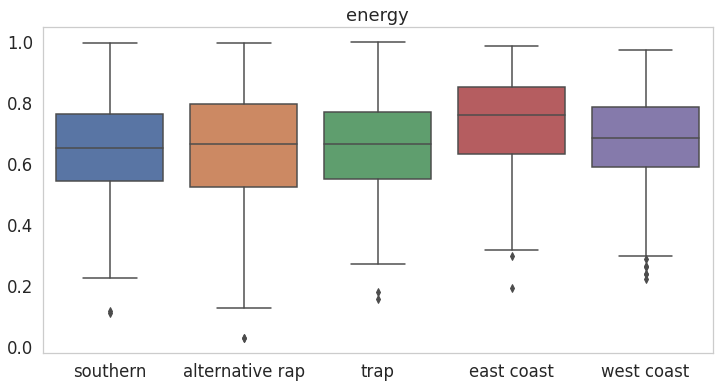

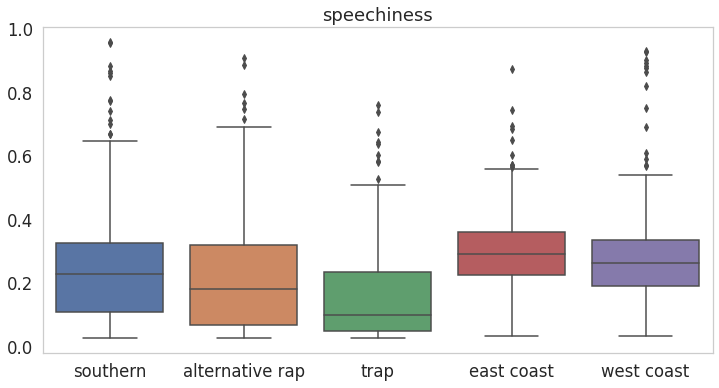

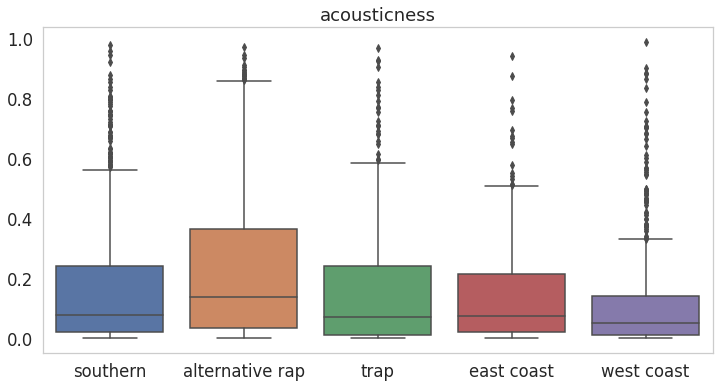

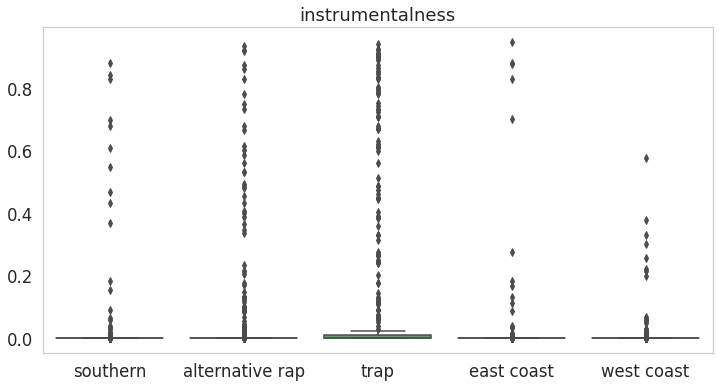

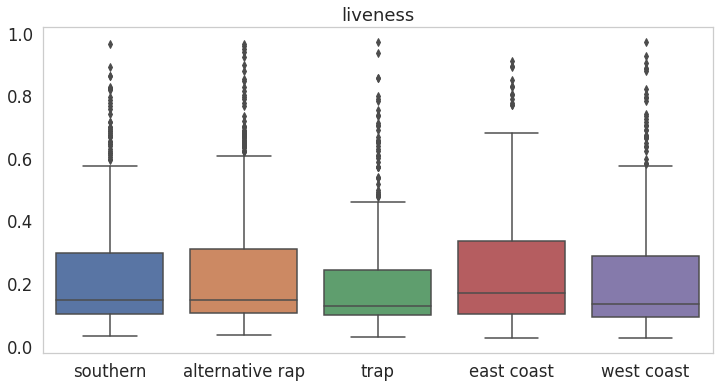

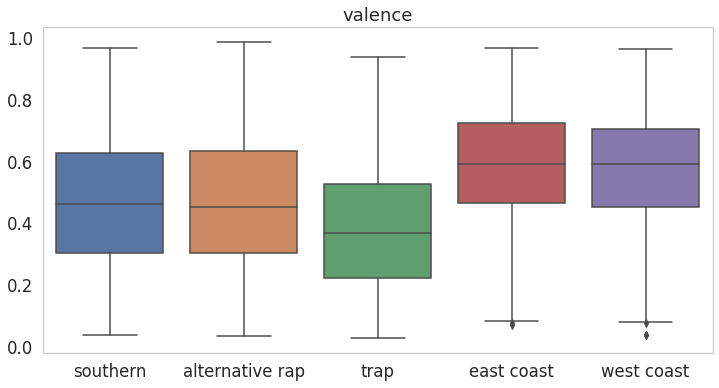

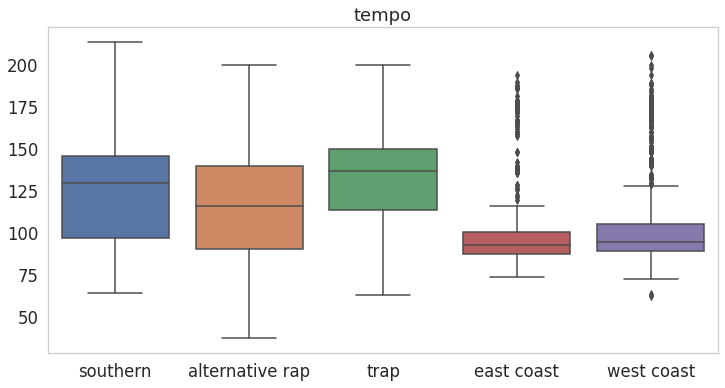

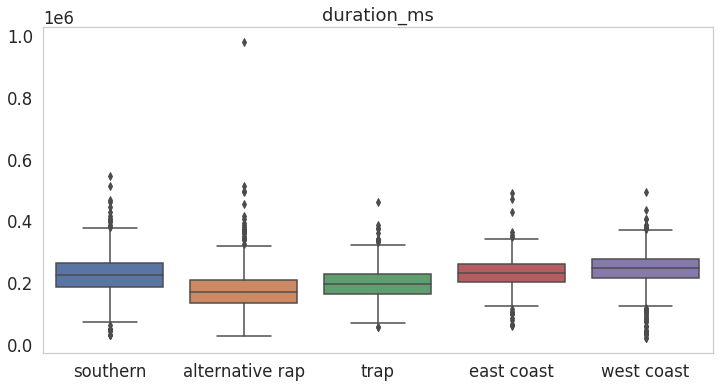

<IPython.core.display.Javascript object>

In [35]:
d = desc_cols[0]
for d in desc_cols:
    plt.figure(figsize=(12, 6))
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid", {"axes.grid": False})

    sns.boxplot(
        x="tag",
        y=d,
        data=filtered_features,
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.title(d)
    plt.show()

In [97]:
filtered_features.sort_values("duration_ms", ascending=True)[
    ["title", "artist", "duration_ms"]
][:10]

,title,artist,duration_ms
id,,,
0fAPYMmOHbVQaFJcfknjfZ,Four,Face Candy,60560
0jOtmMXd83JMEH6elfzXff,Triple Gold,Richie Rich,60973
4qiyzG1nnCzgrNNKutvgUc,King Tee's Beer Stand,King Tee,60976
73EAcOHWDYY1avbJVkndgC,Sweet Devotion,TAPZ,61360
2CMqrz4C9cWBeITvNSIN5H,Everybody Killa,X-Raided,61693
6qvLvTd1QfYtaPpOSqX3jA,BRAIDS FM,NEW INJURIES,62002
1jSnk8m29wNDWywMr1Sx4Q,The Bubble Song,Spongebob Squarepants,62387
5bYkkN3LgnRAu5smO8QEY5,Revelation - 1,Sabac,62853
4bj1Mw45XCatAVhIDk8p1s,Granny Nana,Self Jupiter,63797


<IPython.core.display.Javascript object>

In [98]:
filtered_features.shape

(5411, 19)

<IPython.core.display.Javascript object>

In [100]:
filtered_features[
    filtered_features["title"].str.lower().str.contains("intro|interlude|instrumental")
    == False
].shape

(5411, 19)

<IPython.core.display.Javascript object>

In [101]:
filtered_features[filtered_features["instrumentalness"] <= 0.882]

,artist,title,album,popularity,artist_ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tag
id,,,,,,,,,,,,,,,,,,,
1lYmMZLBWTHPybgmK00OR1,SwizZz,More to Say,More to Say,16,3nSjdp5h4cbbTOn59qKKHR,0.492,0.644,7,-7.405,1,0.5600,0.03480,0.000000,0.1230,0.425,173.440,255451,4,NaN
5MC3xdlx9DFop1Y4J1yDbE,Eagles,"New Kid in Town - Live at Capital Centre, Land...",Hotel California (40th Anniversary Expanded Ed...,30,0ECwFtbIWEVNwjlrfc6xoL,0.559,0.654,4,-7.977,1,0.0312,0.12600,0.000159,0.9790,0.623,110.164,292733,4,NaN
7GZKme55JpmLq3alBDQm11,All Time Low,Dirty Laundry,Last Young Renegade,54,46gyXjRIvN1NL1eCB8GBxo,0.560,0.751,4,-6.022,0,0.0364,0.00168,0.000052,0.1680,0.177,93.969,197640,4,NaN
4d2ETTRKavzvVAdo98g1T9,J.PERIOD,Thought vs. Hot 97 Freestyle - J.PERIOD Live R...,The Live Mixtape [Top 5 MC’s Edition],11,"1MGyQRNDBHqVYkW1nNKRBv, 6DJEUXZm0e2rAohdoZ5Voo...",0.623,0.928,8,-7.647,0,0.3140,0.51100,0.000002,0.7090,0.589,97.357,276292,4,NaN
0V9A00lULZ9ZzNslRXbvIZ,Rhys Langston,Jesus of Los Feliz,Aggressively Ethnically Ambiguous,0,"3TQniQ8z5QYYsAjrWrl72E, 5SIczlZdCyA9JdQsszygHB",0.829,0.666,5,-8.417,0,0.1100,0.73600,0.017300,0.1330,0.584,119.096,132270,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22DYLSLl5MVjkhCWmRzYjy,Wu-Tang Clan,Sound The Horns,Chamber Music,40,"34EP7KEpOjXcM2TCat1ISk, 7fDLDq2weBagiAFD2j17Al...",0.732,0.680,0,-6.640,1,0.1170,0.09350,0.000001,0.1180,0.549,97.066,195387,4,east coast
5SblZH3EFpP8j0O5cJFsrM,Phil J.,LIBERATED,LIBERATED,13,5D2KHBBywjO32ifLVWSci9,0.830,0.645,0,-3.705,1,0.4110,0.30300,0.000016,0.0653,0.844,83.004,237140,4,NaN
3ZKRGwMeoJ7aGCCKwfNNhv,Sicx,Killing Fields,If These Walls Could Talk,6,7DkekyYG58l8cuUWgAfYT7,0.606,0.541,1,-9.363,1,0.3410,0.29500,0.000014,0.1170,0.262,79.849,227213,4,west coast


<IPython.core.display.Javascript object>

In [103]:
filtered_features.sort_values("instrumentalness", ascending=False)[
    ["title", "artist", "instrumentalness", "tag"]
][50:100]

,title,artist,instrumentalness,tag
id,,,,
6xR2JgzngDU4lMXYlN7dfK,5 Star General,Mo Beatz,0.766,NaN
3iSCUM8CCXsruGlIgqGsfr,My Favorite Things,PTP,0.755,NaN
11AZJufpf0EdlyGes9Jgrh,Pressure,RL Grime,0.755,trap
42mRH6vKZKC67XfD9DTHXP,Poetry n Beatz in Motion,Mo Beatz,0.753,NaN
1F2UUSYkyCMPOU2JTdA9Ag,Sabacc Game (3M25),John Powell,0.752,NaN
2DpXgGDJLunwjNRUs9iXKA,Crooked Bad,808INK,0.750,alternative rap
4bsCcAhi3B3lC4ykPTgx8O,Random Words,Brazilian Lounge Project,0.748,NaN
1cgbBk63YGSZDAp4Rkjl2J,Death Of The Hero,Abney Park,0.744,NaN
4or82pWT9zvQNIoGckZiYb,Julia,RL Grime,0.744,trap


<IPython.core.display.Javascript object>

In [104]:
filtered_features.sort_values("acousticness", ascending=False)[
    ["title", "artist", "acousticness", "tag"]
][0:10]

,title,artist,acousticness,tag
id,,,,
6m9qPYXmhge2QhBLfFKnVF,Same Drugs,Chance the Rapper,0.947,southern
6aDyiU2cVrqh33UEnEo3WA,6/10,dodie,0.946,NaN
5HSZ5AvjbGzgfnrScPStrd,Eight,Face Candy,0.945,alternative rap
7s85izscOJfT2QkWTzMARa,Die Easy,Rag'n'Bone Man,0.940,NaN
3UCOHhnYLVw2ODokTTtaka,Party Tattoos,dodie,0.940,NaN
03QSxHqz3CwXE8vsPvqAsv,Graduated,Myles Lloyd,0.938,alternative rap
7o8vTKpUe6GvlssjGhZk7d,Human,dodie,0.938,NaN
3DTIjyEOC7UcQXsjPSoEwP,Walking By,Dido,0.936,NaN
1UBe9K7MECJJOYd20nwhpl,Guiltless,dodie,0.936,NaN


<IPython.core.display.Javascript object>

In [105]:
filtered_features[filtered_features["acousticness"] <= 0.95]

,artist,title,album,popularity,artist_ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tag
id,,,,,,,,,,,,,,,,,,,
1lYmMZLBWTHPybgmK00OR1,SwizZz,More to Say,More to Say,16,3nSjdp5h4cbbTOn59qKKHR,0.492,0.644,7,-7.405,1,0.5600,0.03480,0.000000,0.1230,0.425,173.440,255451,4,NaN
5MC3xdlx9DFop1Y4J1yDbE,Eagles,"New Kid in Town - Live at Capital Centre, Land...",Hotel California (40th Anniversary Expanded Ed...,30,0ECwFtbIWEVNwjlrfc6xoL,0.559,0.654,4,-7.977,1,0.0312,0.12600,0.000159,0.9790,0.623,110.164,292733,4,NaN
7GZKme55JpmLq3alBDQm11,All Time Low,Dirty Laundry,Last Young Renegade,54,46gyXjRIvN1NL1eCB8GBxo,0.560,0.751,4,-6.022,0,0.0364,0.00168,0.000052,0.1680,0.177,93.969,197640,4,NaN
4d2ETTRKavzvVAdo98g1T9,J.PERIOD,Thought vs. Hot 97 Freestyle - J.PERIOD Live R...,The Live Mixtape [Top 5 MC’s Edition],11,"1MGyQRNDBHqVYkW1nNKRBv, 6DJEUXZm0e2rAohdoZ5Voo...",0.623,0.928,8,-7.647,0,0.3140,0.51100,0.000002,0.7090,0.589,97.357,276292,4,NaN
0V9A00lULZ9ZzNslRXbvIZ,Rhys Langston,Jesus of Los Feliz,Aggressively Ethnically Ambiguous,0,"3TQniQ8z5QYYsAjrWrl72E, 5SIczlZdCyA9JdQsszygHB",0.829,0.666,5,-8.417,0,0.1100,0.73600,0.017300,0.1330,0.584,119.096,132270,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22DYLSLl5MVjkhCWmRzYjy,Wu-Tang Clan,Sound The Horns,Chamber Music,40,"34EP7KEpOjXcM2TCat1ISk, 7fDLDq2weBagiAFD2j17Al...",0.732,0.680,0,-6.640,1,0.1170,0.09350,0.000001,0.1180,0.549,97.066,195387,4,east coast
5SblZH3EFpP8j0O5cJFsrM,Phil J.,LIBERATED,LIBERATED,13,5D2KHBBywjO32ifLVWSci9,0.830,0.645,0,-3.705,1,0.4110,0.30300,0.000016,0.0653,0.844,83.004,237140,4,NaN
3ZKRGwMeoJ7aGCCKwfNNhv,Sicx,Killing Fields,If These Walls Could Talk,6,7DkekyYG58l8cuUWgAfYT7,0.606,0.541,1,-9.363,1,0.3410,0.29500,0.000014,0.1170,0.262,79.849,227213,4,west coast


<IPython.core.display.Javascript object>

In [108]:
mult_id_tag

,sp_tag_cons,fm_tag,sp_filled,fm_filled
sp_song_id,,,,
003jkRNJgEDGcWGPatebHa,southern,southern,southern,southern
008DCRi4MybmSHKzU3WNBt,NaN,NaN,NaN,NaN
00AAj1kdx0mf5agqVniktg,east coast,NaN,east coast,east coast
00BVCwOFPMVboVah2vxgQj,southern,trap,southern,trap
00CVY07T9feLMyIdlatufZ,NaN,alternative rap,alternative rap,alternative rap
...,...,...,...,...
7zL7fpZhwFkCLBU4T045sA,west coast,west coast,west coast,west coast
7zLCMBMKYkYRUz2ETmz45o,west coast,west coast,west coast,west coast
7zM9AkYxe5I8DhyosYodPS,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [109]:
mult_id_tag = mult_id_tag.loc[filtered_features.index]

<IPython.core.display.Javascript object>

In [110]:
mult_id_tag.to_csv("../data/filtered_mult_id_tag.csv")

<IPython.core.display.Javascript object>

In [106]:
filtered_features[["fm_tag"]].to_csv("../data/filtered_id_tags.csv")

KeyError: "None of [Index(['fm_tag'], dtype='object')] are in the [columns]"

<IPython.core.display.Javascript object>

In [99]:
filtered_features

,artist,title,album,popularity,artist_ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tag
id,,,,,,,,,,,,,,,,,,,
1lYmMZLBWTHPybgmK00OR1,SwizZz,More to Say,More to Say,16,3nSjdp5h4cbbTOn59qKKHR,0.492,0.644,7,-7.405,1,0.5600,0.03480,0.000000,0.1230,0.425,173.440,255451,4,NaN
5MC3xdlx9DFop1Y4J1yDbE,Eagles,"New Kid in Town - Live at Capital Centre, Land...",Hotel California (40th Anniversary Expanded Ed...,30,0ECwFtbIWEVNwjlrfc6xoL,0.559,0.654,4,-7.977,1,0.0312,0.12600,0.000159,0.9790,0.623,110.164,292733,4,NaN
7GZKme55JpmLq3alBDQm11,All Time Low,Dirty Laundry,Last Young Renegade,54,46gyXjRIvN1NL1eCB8GBxo,0.560,0.751,4,-6.022,0,0.0364,0.00168,0.000052,0.1680,0.177,93.969,197640,4,NaN
4d2ETTRKavzvVAdo98g1T9,J.PERIOD,Thought vs. Hot 97 Freestyle - J.PERIOD Live R...,The Live Mixtape [Top 5 MC’s Edition],11,"1MGyQRNDBHqVYkW1nNKRBv, 6DJEUXZm0e2rAohdoZ5Voo...",0.623,0.928,8,-7.647,0,0.3140,0.51100,0.000002,0.7090,0.589,97.357,276292,4,NaN
0V9A00lULZ9ZzNslRXbvIZ,Rhys Langston,Jesus of Los Feliz,Aggressively Ethnically Ambiguous,0,"3TQniQ8z5QYYsAjrWrl72E, 5SIczlZdCyA9JdQsszygHB",0.829,0.666,5,-8.417,0,0.1100,0.73600,0.017300,0.1330,0.584,119.096,132270,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22DYLSLl5MVjkhCWmRzYjy,Wu-Tang Clan,Sound The Horns,Chamber Music,40,"34EP7KEpOjXcM2TCat1ISk, 7fDLDq2weBagiAFD2j17Al...",0.732,0.680,0,-6.640,1,0.1170,0.09350,0.000001,0.1180,0.549,97.066,195387,4,east coast
5SblZH3EFpP8j0O5cJFsrM,Phil J.,LIBERATED,LIBERATED,13,5D2KHBBywjO32ifLVWSci9,0.830,0.645,0,-3.705,1,0.4110,0.30300,0.000016,0.0653,0.844,83.004,237140,4,NaN
3ZKRGwMeoJ7aGCCKwfNNhv,Sicx,Killing Fields,If These Walls Could Talk,6,7DkekyYG58l8cuUWgAfYT7,0.606,0.541,1,-9.363,1,0.3410,0.29500,0.000014,0.1170,0.262,79.849,227213,4,west coast


<IPython.core.display.Javascript object>